UMAP es una técnica que busca una reducción de la dimensión tomando en cuenta la estructura global de los datos, a diferencia de $t$-SNE que preserva sólo la localidad. El algoritmo usa la topología para obtener la estructura de los datos. Se asume que los datos están uniformemente distribuidos a lo largo de una [variedad](https://es.wikipedia.org/wiki/Variedad_(matem%C3%A1ticas)). Como no todos los conjuntos de datos cumplen esta restricción, se puede forzar tomando a los vecinos cercanos como una noción de vecindad.

Una vencindad para el punto $x$ estará dada por sus $k$ vecinos cercanos. Con esto, se forma el grafo pesado $G$ donde cada vértice es un elemento del conjunto de datos y las aristas conectan a los vecinos. El peso de la arista $e=(x_i,x_j)$ se denota $w_e$ indica la probabilidad de que el punto $x_j$ sea uno de los $k$ vecinos de $x_i$ (o viceversa).

Se busca formar un grafo $G'$ que tenga la misma (o una muy similar) topología que $G$ pero donde los vértices estén en un espacio de dimensión más chica (2 ó 3). La función de pérdida está dada por (cross-entropy loss):

$$\sum_{e\in E}\left( w_e\log\frac{w_e}{w_e'} + (1-w_e)\log\frac{1-w_e}{1-w_e'}\right)$$

donde $E$ es el conjunto de aristas y $w_e'$ es el peso del vértice $e$ en $G'$.

Si $w_e$ es grande, el término $w_e\log\frac{w_e}{w_e'}$ se minimiza cuando $w_e'$ es grande. Por el contrario, si  $w_e$ es pequeño, $(1-w_e)\log\frac{1-w_e}{1-w_e'}$ se minimiza cuando $w_e'$ es pequeño.

La función de pérdida se minimiza usando descenso de gradiente.

Para ver los detalles puede consultar [esta página](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) o [el artículo de UMAP](https://arxiv.org/abs/1802.03426).


Vamos a ver unos ejemplos del uso de la librería. Los datos que vamos a usar son MNIST. Veremos como cambian las reducciones para varios parámetros de UMAP.

In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X = mnist.data
y = mnist.target.astype(np.uint8)

X.shape, y.shape

((70000, 784), (70000,))

Primero vamos a variar el parámetro `n_neighbors`.

C:\Users\msubr\Anaconda3\envs\sbert\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


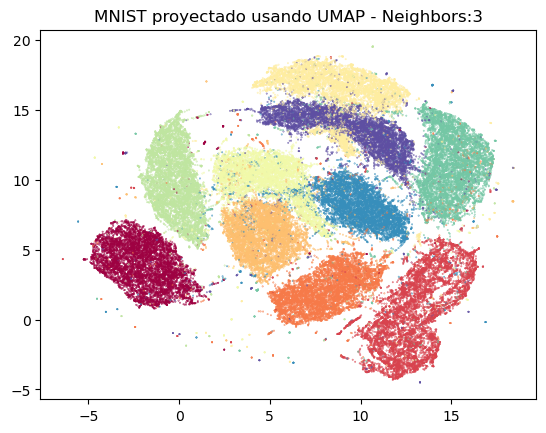

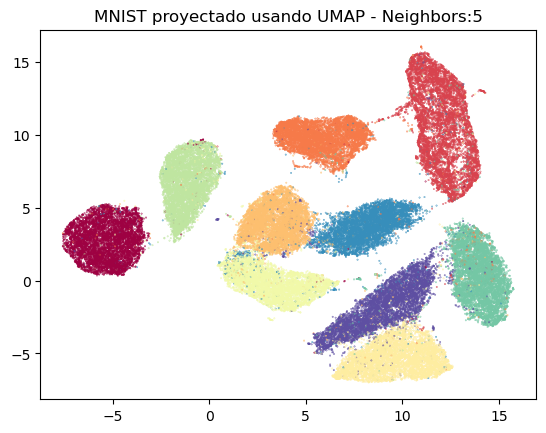

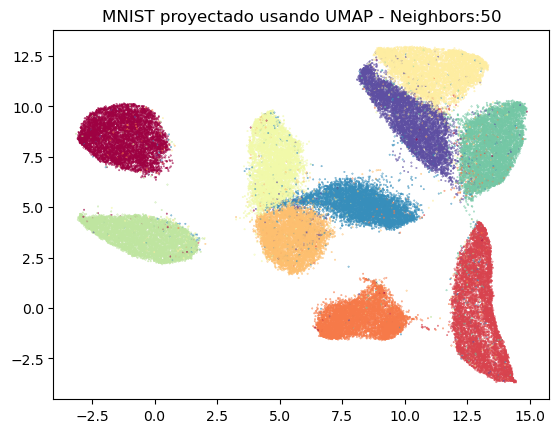

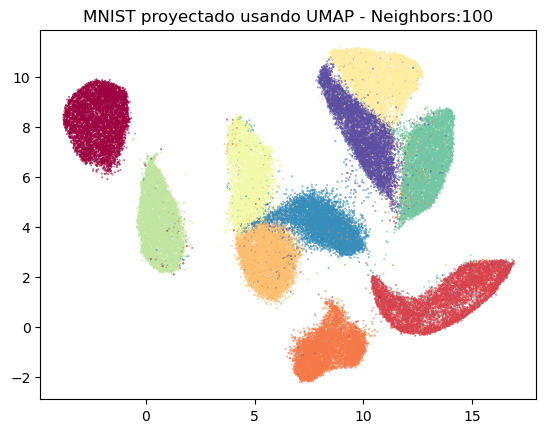

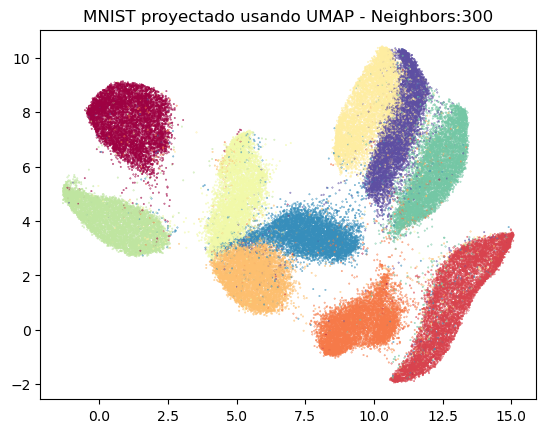

In [5]:
neighbors = [3, 5, 50, 100, 300]
for neig in neighbors:
    reducer = umap.UMAP(n_components=2, n_neighbors=neig, min_dist=.2)
    embedding = reducer.fit_transform(X)
    plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y,
            s=0.1,
            cmap='Spectral')
    plt.title(f"MNIST proyectado usando UMAP - Neighbors:{neig}")
    plt.show()

El parámetro `n_neighbors` controla el número de vecinos que se tomarán para formar el grafo $G$. Este parámetro indica qué tanto se debe tomar en cuenta la estructura global de los datos. Cuando es alto, el grafo $G$ tiene la estructura global pero si es bajo, captura la estructura loca. Es dedir, si se toma un valor muy pequeño, el grafo puede quedar con muchas componentes conexas muy pequeñas y se verán muchos cúmulos en la proyección. Si se toma un valor muy grande, los clusters tenderán a juntarse. 

Otro parámetro que vamos a variar es `min_dist` que dice la mínima distancia para considerar los cluster.

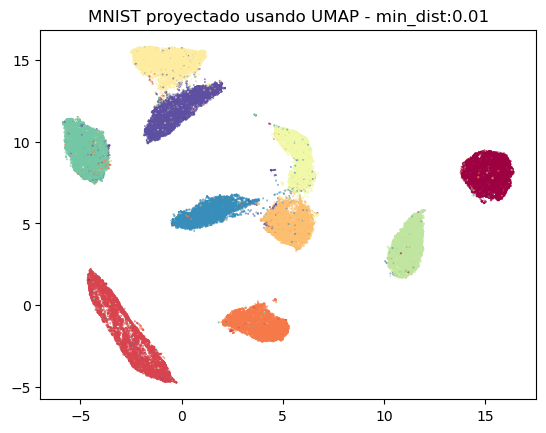

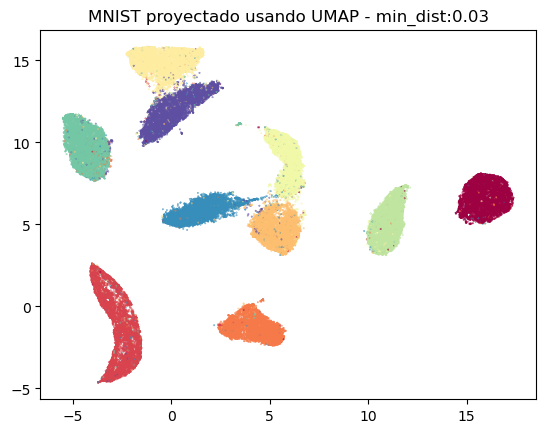

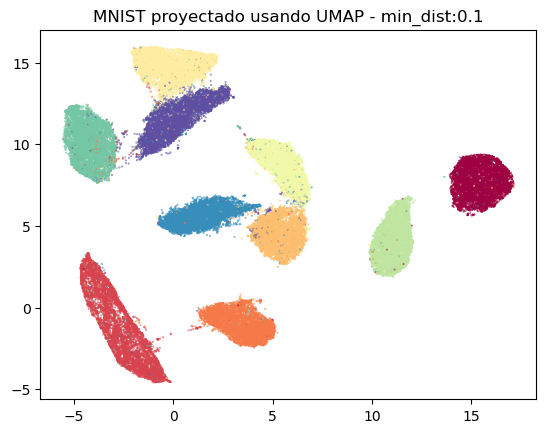

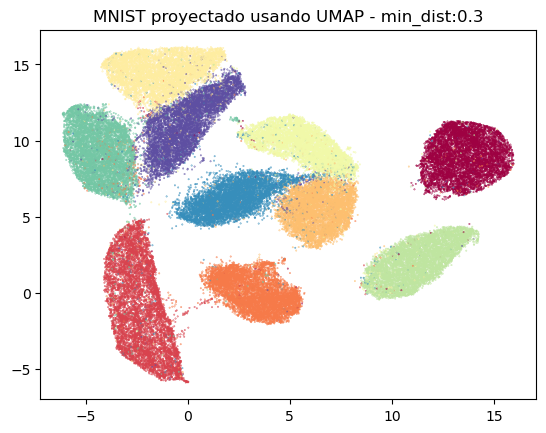

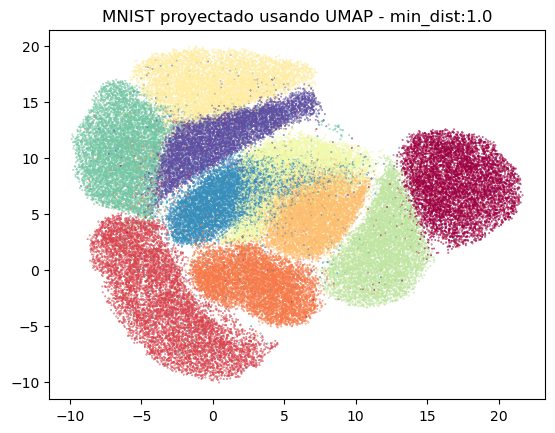

In [8]:
min_dist = [0.01, 0.03, 0.1, 0.3, 1.0]
for d in min_dist:
    reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=d)
    embedding = reducer.fit_transform(X)
    plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y,
            s=0.1,
            cmap='Spectral')
    plt.title(f"MNIST proyectado usando UMAP - min_dist:{d}")
    plt.show()